# Capital Asset Pricing Model (CAPM)



Given 2 assets, we can create any different portfolios

In [1]:
# import all libraries we'll need
import pandas as pd # For datasets
import matplotlib.pyplot as pl # For plots
import numpy as np # For numerical operations like algorithm

# Tell the application to show plots within webpage
%matplotlib inline

# Display only two decimals to avoid distraction
pd.set_option('display.precision',2)

Data sample
             MSFT    WMT
Date                    
2000-01-03  37.29  45.75
2000-01-04  36.03  44.04
2000-01-05  36.41  43.14
2000-01-06  35.19  43.61
2000-01-07  35.65  46.91


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014C688EC0C8>,
      dtype=object)

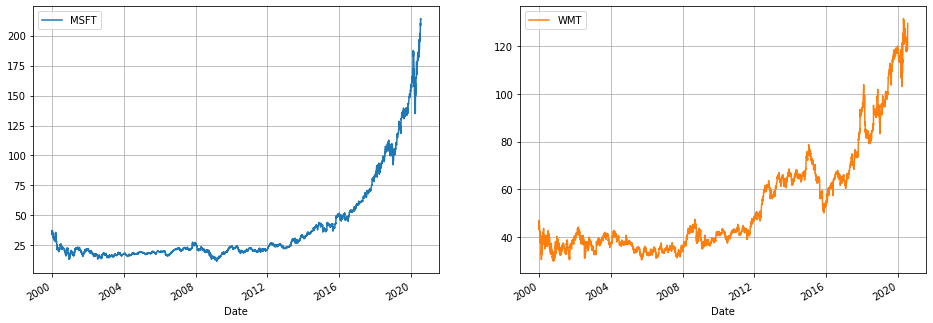

In [18]:
# Reada data from csv files for each stock and show a data sample
data_location = './data/mkt/'

# Define stocks for study
names = ['Microsoft', 'Walmart']
tickers = ['MSFT', 'WMT']

# Load pricing data from the selected stacks, each from one .csv file
for i in range(len(tickers)):
    ticker_ = tickers[i].replace('^','_')
    df = pd.read_csv(data_location + ticker_ + '.csv')
    if i <= 0:      
        new_df = df
        new_df.Date = pd.to_datetime(new_df.Date).copy()
        new_df = new_df.rename(columns = {names[i]:tickers[i]})
    else:          
        new_df[tickers[i]] = df[[names[i]]]

# We store only the Adjusted Close Price and we align all time series
new_df = new_df.set_index(new_df.Date)
new_df = new_df.drop('Date',axis=1)

# Show a sample of the data
print ('Data sample')
print (new_df.head())
new_df.plot(subplots = True, layout = (2,2), figsize = (16,12), grid = True)

In [19]:
returns = new_df.pct_change()
returns

,MSFT,WMT
Date,,
2000-01-03,NaN,NaN
2000-01-04,-3.38e-02,-3.74e-02
2000-01-05,1.05e-02,-2.04e-02
2000-01-06,-3.35e-02,1.09e-02
2000-01-07,1.31e-02,7.56e-02
...,...,...
2020-07-06,2.15e-02,-2.68e-03
2020-07-07,-1.16e-02,6.78e-02
2020-07-08,2.20e-02,-1.98e-02


In [20]:
# A portfolio is just a vector of weights,for instance 50% Walmart, 50% Microsoft

weights = np.array([x / 20.0 for x in range(21)])

#print weights
portfolio = np.matrix(np.array([weights , 1-weights]))
portfolio = portfolio.transpose()
print(portfolio)
print(np.shape(portfolio))

[[0.   1.  ]
 [0.05 0.95]
 [0.1  0.9 ]
 [0.15 0.85]
 [0.2  0.8 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.35 0.65]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.5  0.5 ]
 [0.55 0.45]
 [0.6  0.4 ]
 [0.65 0.35]
 [0.7  0.3 ]
 [0.75 0.25]
 [0.8  0.2 ]
 [0.85 0.15]
 [0.9  0.1 ]
 [0.95 0.05]
 [1.   0.  ]]
(21, 2)


Expected Returns [[Microsoft, Walmart]]: [[52.4111074 18.3105635]]

Covarianc Matrix 
[[0.16340479 0.07399489]
 [0.07399489 0.09100249]]

Correlation Matrix 
[[1.         0.60679603]
 [0.60679603 1.        ]]

Expected returns of 21 portfolios: [[18.3105635  20.0155907  21.72061789 23.42564509 25.13067228 26.83569948
  28.54072667 30.24575387 31.95078106 33.65580826 35.36083545 37.06586265
  38.77088984 40.47591704 42.18094423 43.88597143 45.59099862 47.29602582
  49.00105301 50.70608021 52.4111074 ]]

Risk of 21 portfolios [[30.16661847 29.9278752  29.77669278 29.71440773 29.74157855 29.85796104
  30.06251909 30.35347008 30.72836006 31.18416189 31.71738748 32.32420545
  33.0005564  33.74225928 34.54510493 35.40493416 36.31769989 37.27951398
  38.28668012 39.33571482 40.42335861]]



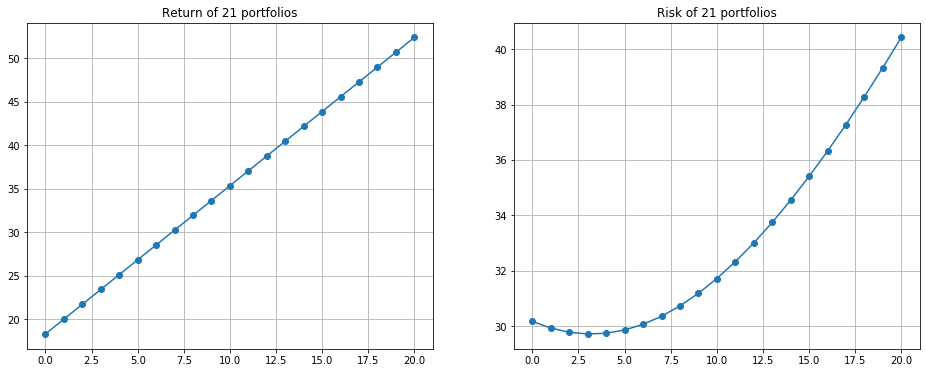

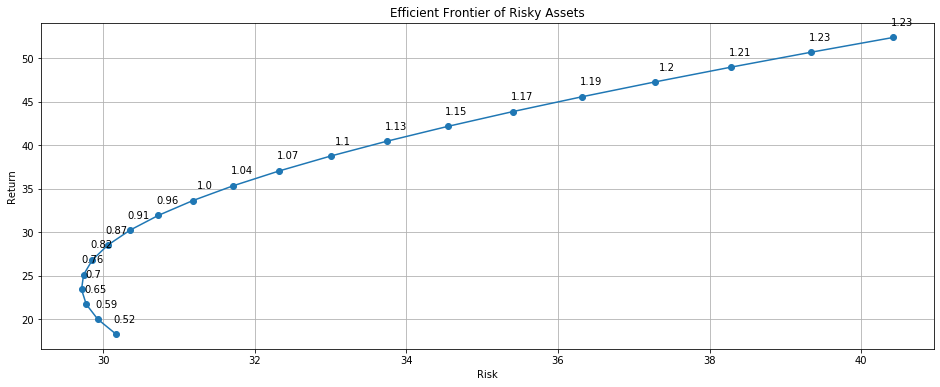

In [39]:
# We need the portfolio returns
risk_free_rate = 2.5
# Calculate the expected returns for Microsoft and Walmart using last year of daily returns (250 days)
r = np.matrix([returns.iloc[-250:].MSFT.sum() * 100, returns.iloc[-250:].WMT.sum() * 100])
print('Expected Returns [[Microsoft, Walmart]]: %s' %r)
print()

# Calculate covariance matgrix between Walmart and Microsoft
V = np.cov(returns.iloc[-250:].MSFT, returns.iloc[-250:].WMT) * 250
print('Covarianc Matrix \n%s\n' %V)

#Calculate correlation matrix between Walmart and Microfost
rho = np.corrcoef(returns.iloc[-250:].MSFT, returns.iloc[-250:].WMT)
print('Correlation Matrix \n%s\n' %rho)

# Initialize Plots
fig = pl.figure(figsize = (16,6))
ax1 = pl.subplot(121)
ax2 = pl.subplot(122)

# Step 1: Calculate the returns of 21 portfolios
port_ret = portfolio * r.T
print('Expected returns of 21 portfolios: %s' % port_ret.T)
print()
ax1.plot(port_ret,'-o')
ax1.grid()
ax1.set_title('Return of 21 portfolios')

#------------------------------------------------------

# Step 2 Calculate the risk of 21 portfolios
port_sigma = portfolio[:,0]*0
for i in range(len(portfolio)):
    port_sigma[i] = 100*np.sqrt(portfolio[i,:] * V * portfolio[i,:].transpose())
    
print('Risk of 21 portfolios %s' % port_sigma.T)
print()

portfolios_sharpe_ratios = np.round((port_ret - risk_free_rate) / port_sigma,2)

ax2.plot(port_sigma,'-o')
ax2.grid()
ax2.set_title('Risk of 21 portfolios')

#Plot Efficient Frontier
pl.figure(figsize = (16,6))
pl.plot(port_sigma, port_ret,'-o')
pl.grid()
pl.title('Efficient Frontier of Risky Assets')
pl.xlabel('Risk')
pl.ylabel('Return')
for label,x,y in zip(portfolios_sharpe_ratios, port_sigma, port_ret):
    pl.annotate(float(label), xy = (x,y), xytext = (20,20), textcoords = 'offset points', ha='right', va='top')

In [40]:
print(portfolios_sharpe_ratios.T)

[[0.52 0.59 0.65 0.7  0.76 0.82 0.87 0.91 0.96 1.   1.04 1.07 1.1  1.13
  1.15 1.17 1.19 1.2  1.21 1.23 1.23]]


Text(0, 0.5, 'Return')

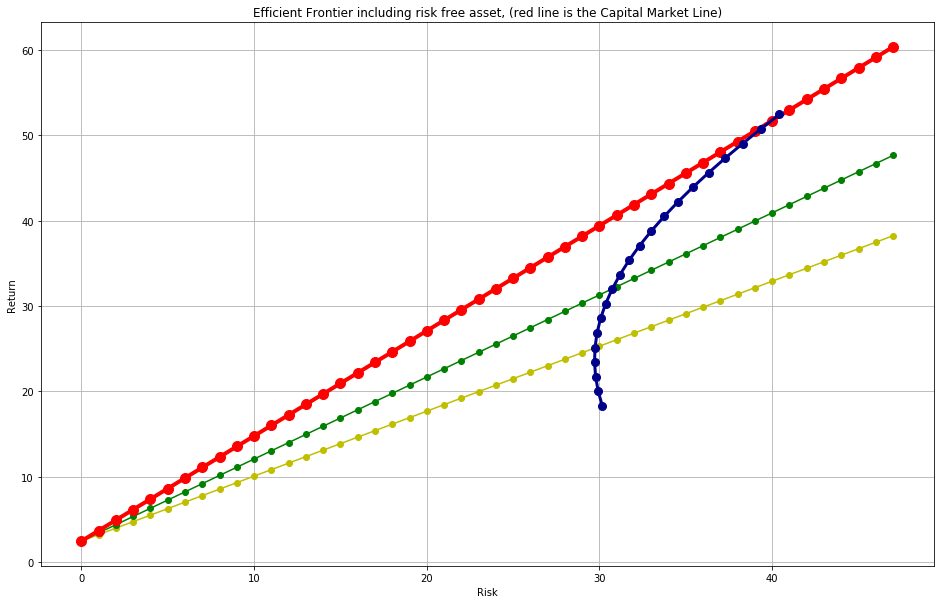

In [45]:
x2 = np.matrix(range(48))

y1 = np.multiply(x2, portfolios_sharpe_ratios[4]) + risk_free_rate
y2 = np.multiply(x2, portfolios_sharpe_ratios[8]) + risk_free_rate
y7 = np.multiply(x2, portfolios_sharpe_ratios[19]) + risk_free_rate

# Plot Efficient Frontier
pl.figure(figsize = (16,10))
pl.plot(x2.T, y1.T, 'o', linestyle = '-', color = 'y')
pl.plot(x2.T, y2.T, 'o', linestyle = '-', color = 'g')
pl.plot(x2.T, y7.T, 'o', linestyle = '-', color = 'r', linewidth = 4, markersize = 10)

pl.plot(port_sigma, port_ret, 'o', linestyle = '-', color = 'DarkBlue', linewidth = 3, markersize = 8)
pl.grid()
pl.title('Efficient Frontier including risk free asset, (red line is the Capital Market Line)')
pl.xlabel('Risk')
pl.ylabel('Return')


Question: How do we determine the percentage we should invest in the risk free rate and what percentage in the risky portfolio?

Once we have estabished the Market Capital Line, we can use this line to find any point on it. So we determine the level of risk we are willing to tolerate, let's call it MaxRiskTol, then we can see wht level of Return on the MCL we can expect for this level of risk, let's call it InvestorExpectedReturn

Then we can determine the weights using the following equation:

$$ RiskyPortfolioReturn * weight + RiskFreeRate * (1 - weight) = InvestorExpectedREturn $$

Finaly we solve for weight:

$$ weight = \frac{(InvestorExpectedREturn - RiskFreeRate)}{(RiskyPortfolioReturn - RiskFreeRate)} $$


Compare with CAPM equation:

$$ r = RFR + \beta \space (RM - RFR) $$

or 

$$ (r - RFR) = \beta \space (RM -RFR) $$

Where r is the investor's portfolio expected return and RM is Market Return

Or seen in a different light:

$$ \beta = \frac{(r - RFR)}{(RM - RFR)} $$

Intriguintly, the weight that we invest in the fisky portfolio has the same value as $\beta$ of the investor's portflio/asset to the market in CAPM

For instance, if we estimate that the weight we need to allocate to the risky portfolio in order to get the investor's expected return is 1, this means that the $\beta$ of their portfolio should also be 1.

In this case, we don't need to assign any weight to the risk free asset as we can achieve the maximum sharpe ratio available in the market by holding the marked portfolio, which is within our risk tolerance constraing

$\beta$ becomes effectively the leverage imposed to the market portfolio to achieve the investor's expected rate of return. 